In [1]:
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
d = {'x' : [15,15,16,19,19,20,20,21,22,28,35,40,41,42,43,44,60,61,65] }

df = pd.DataFrame(d,columns=['x'])


In [5]:
kmeans = KMeans(n_clusters=2).fit(df)
centroids = kmeans.cluster_centers_
print(centroids)

labels = kmeans.labels_
labels 

[[47.88888889]
 [19.5       ]]


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [6]:
beer = pd.read_csv('beers.csv')
beer.head()

,Brand,Brewery,PercentAlcohol,Calories,Carbohydrates
0,Anchor Steam,Anchor,4.9,153,16.0
1,Anheuser Busch Natural Light,Anheuser Busch,4.2,95,3.2
2,Anheuser Busch Natural Ice,Anheuser Busch,5.9,157,8.9
3,Aspen Edge,Adolph Coors,4.1,94,2.6
4,Blatz Beer,Pabst,4.8,153,12.5


In [7]:
beer.columns

Index(['Brand', 'Brewery', 'PercentAlcohol', 'Calories', 'Carbohydrates'], dtype='object')

In [12]:
beer_num = beer[['PercentAlcohol', 'Calories', 'Carbohydrates']]


In [17]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
beer_t = sc.fit_transform(beer_num)

C:\Users\Shyam Sundar\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Shyam Sundar\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [18]:
kmeans = KMeans(n_clusters=2).fit(beer_t)
centroids = kmeans.cluster_centers_
print(centroids)

labels = kmeans.labels_
labels 

[[-0.97064549 -1.329196   -1.18112582]
 [ 0.37573374  0.51452749  0.45720999]]


array([1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1])

In [19]:
cluster_errors = []
for i in range(1,21):
    kmeans = KMeans(n_clusters=i).fit(beer_t)
    centroids = kmeans.cluster_centers_
    cluster_errors.append(kmeans.inertia_)
 

In [20]:
cl_df = pd.DataFrame({'num_cl': range(1,21),'cluster_errors':cluster_errors})
cl_df[0:10]

,num_cl,cluster_errors
0,1,258.000000
1,2,121.377419
2,3,88.272281
3,4,59.203448
4,5,39.788677
5,6,32.321725
6,7,27.248051
7,8,23.516165
8,9,19.883875
9,10,16.776971


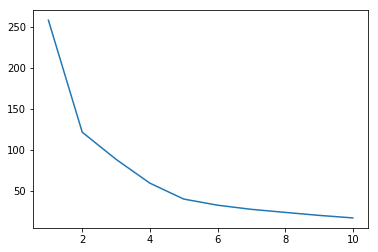

In [21]:
plt.plot(cl_df['num_cl'][0:10],cl_df['cluster_errors'][0:10]);

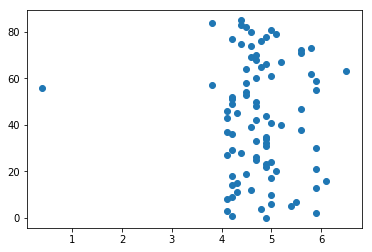

In [22]:
plt.scatter(beer_num['PercentAlcohol'],beer_num.index,cmap=labels)

# Cancer dataset 

In [23]:
from sklearn.datasets import load_breast_cancer
cc = load_breast_cancer()
cc = pd.DataFrame(cc.data,columns = cc.feature_names)
cc.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [24]:
cc.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

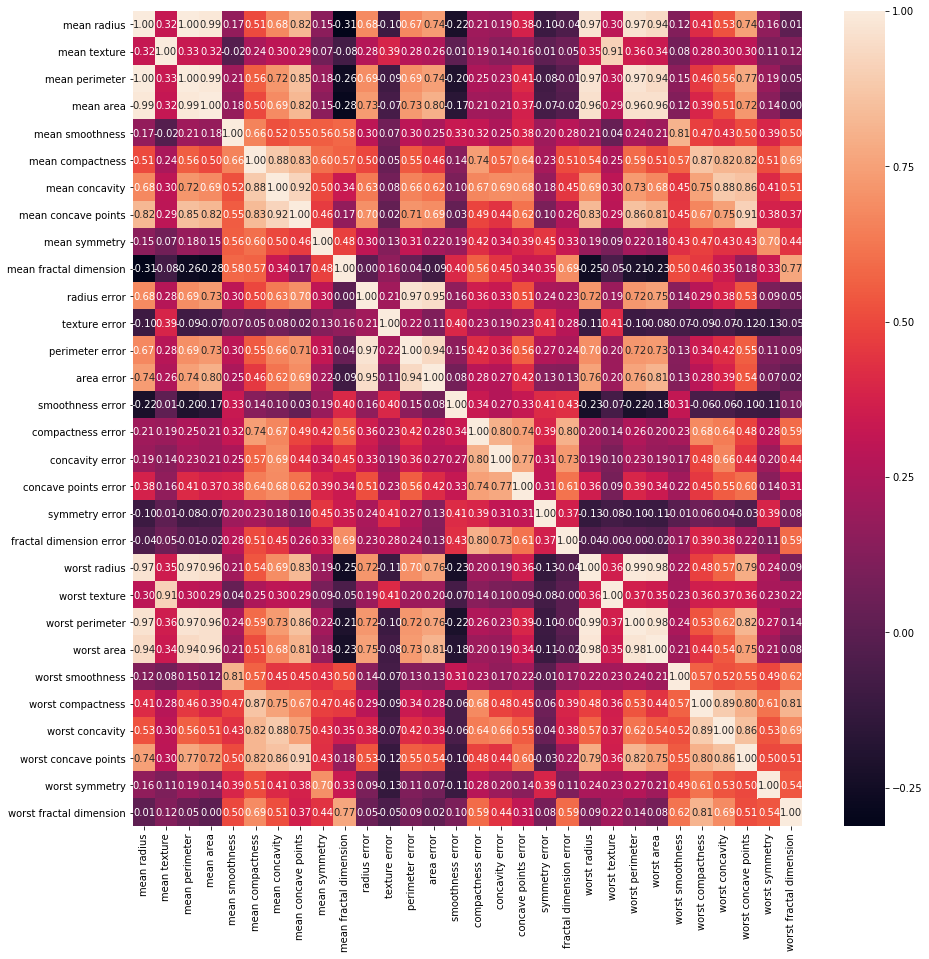

In [11]:
plt.figure(figsize=(15,15))
sns.heatmap(cc.corr(),annot=True,fmt='.2f')

In [12]:
import plotly
plotly.tools.set_credentials_file(username='Shyam4801', api_key='FbsutZ57vnERAlGdbfAY')

In [14]:

import plotly.plotly as py
import plotly.graph_objs as go

import numpy as np

# x, y, z = np.random.multivariate_normal(np.array([0,0,0]), np.eye(3), 400).transpose()

trace1 = go.Scatter3d(
    x=cc['mean radius'],
    y=cc['mean area'],
    z=cc['mean texture'],
    mode='markers',
    marker=dict(
        size=12,                # set color to an array/list of desired values
        colorscale='Viridis',   # choose a colorscale
        opacity=0.8
    )
)

data = [trace1]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='3d-scatter-colorscale')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~Shyam4801/0 or inside your plot.ly account where it is named '3d-scatter-colorscale'


C:\Users\Shyam Sundar\Anaconda3\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [25]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
cc_t = sc.fit_transform(cc)
cc_t

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [26]:
cccluster_errors = []
for i in range(1,21):
    kmeans = KMeans(n_clusters=i).fit(cc_t)
    centroids = kmeans.cluster_centers_
    cccluster_errors.append(kmeans.inertia_)
 

In [27]:
cc_df = pd.DataFrame({'num_cl': range(1,21),'cluster_errors':cccluster_errors})
cc_df[0:10]

,num_cl,cluster_errors
0,1,17070.000000
1,2,11595.461474
2,3,10061.797818
3,4,9264.734823
4,5,8554.859373
5,6,7966.642109
6,7,7541.404069
7,8,7148.993269
8,9,6819.075709
9,10,6713.673807


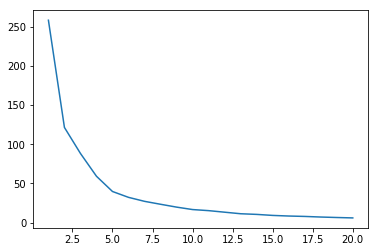

In [28]:
plt.plot(cl_df['num_cl'],cl_df['cluster_errors']);

In [29]:
ckmeans = KMeans(n_clusters=2).fit(cc_t)
centroids = kmeans.cluster_centers_
print(centroids)

clabels = ckmeans.labels_
clabels 

[[-6.51865008e-01 -5.65395517e-01 -6.13326399e-01 -6.37027680e-01
   1.37113473e+00  4.12473834e-01 -1.78312355e-01 -8.88750863e-02
   4.83708064e-01  1.09493168e+00 -1.40194295e-01  4.38429985e-01
  -1.16220075e-01 -3.07522779e-01  1.16964969e+00  4.43547594e-01
   1.72186720e-01  6.98875488e-01  3.93010593e-01  6.30513805e-01
  -6.79003755e-01 -6.10968094e-01 -6.45356947e-01 -6.43981663e-01
   7.73201510e-01 -7.32563117e-02 -3.46519561e-01 -2.02336600e-01
  -2.09511830e-01  2.76103606e-01]
 [ 1.39782773e+00  5.65022091e-01  1.32939544e+00  1.36641081e+00
  -2.02166362e-01  6.25455271e-02  3.99607566e-01  7.60494769e-01
  -3.15865257e-01 -9.76317668e-01  4.04415667e-01 -4.62549934e-01
   3.26081616e-01  4.92270717e-01 -5.16407070e-01 -2.83813408e-01
  -1.19667043e-01  9.89464560e-02 -6.89277108e-01 -4.64766646e-01
   1.41093079e+00  5.63808194e-01  1.32150807e+00  1.34355276e+00
   1.22656008e-01  2.01405633e-01  4.62253589e-01  9.19084171e-01
   1.46648594e-02 -3.16093061e-01]
 [-8.8

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,

In [30]:
cy = pd.Series(clabels)
x = cc[['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension']]
cy.shape

(569,)

In [31]:
##Train test split
from sklearn.model_selection import train_test_split
seed = 7
np.random.seed(seed)

X_train, X_test, y_train, y_test = train_test_split(x, cy, test_size=0.20, random_state = 123)

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [33]:
log = LogisticRegression()
log.fit(X_train,y_train)

C:\Users\Shyam Sundar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [34]:
cypred = log.predict(X_test)

In [35]:
accuracy_score(y_test,cypred)

0.9824561403508771

In [36]:
from sklearn.metrics import confusion_matrix,auc,roc_auc_score


In [37]:
confusion_matrix(y_test,cypred)

array([[33,  0],
       [ 2, 79]], dtype=int64)

In [38]:
a = load_breast_cancer()
diag = pd.Series(a.target)
diag.shape

(569,)

In [39]:
# Score using Actual diagnosis column in the dataset 
accuracy_score(cy,diag)

0.9103690685413005

In [40]:
confusion_matrix(cy,diag)

array([[175,  14],
       [ 37, 343]], dtype=int64)

In [41]:
log.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'max_iter': 100,
 'multi_class': 'warn',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'warn',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

# Decision tree

In [43]:
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics


#Machine Learning Algorithm (MLA) Selection and Initialization
MLA = [
    ensemble.RandomForestClassifier(),

    linear_model.LogisticRegressionCV(),
   
    #Navies Bayes
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    
    #Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    
    #SVM
    svm.SVC(probability=True),
    svm.NuSVC(probability=True),
    svm.LinearSVC(),
    
    #Trees    
    tree.DecisionTreeClassifier(),

    
    #Discriminant Analysis
    discriminant_analysis.LinearDiscriminantAnalysis(),
    discriminant_analysis.QuadraticDiscriminantAnalysis(),
    
    ]



#split dataset in cross-validation with this splitter class: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ShuffleSplit.html#sklearn.model_selection.ShuffleSplit
#note: this is an alternative to train_test_split
cv_split = model_selection.ShuffleSplit(n_splits = 10, test_size = .3, train_size = .6, random_state = 0 ) # run model 10x with 60/30 split intentionally leaving out 10%

#create table to compare MLA metrics
MLA_columns = ['MLA Name', 'MLA Parameters','MLA Train Accuracy Mean', 'MLA Test Accuracy Mean', 'MLA Test Accuracy 3*STD' ,'MLA Time']
MLA_compare = pd.DataFrame(columns = MLA_columns)

#create table to compare MLA predictions
MLA_predict = diag

#index through MLA and save performance to table
row_index = 0
for alg in MLA:

    #set name and parameters
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Parameters'] = str(alg.get_params())
    
    #score model with cross validation: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate
    cv_results = model_selection.cross_validate(alg, x, cy, cv  = cv_split)

    MLA_compare.loc[row_index, 'MLA Time'] = cv_results['fit_time'].mean()
    MLA_compare.loc[row_index, 'MLA Train Accuracy Mean'] = cv_results['train_score'].mean()
    MLA_compare.loc[row_index, 'MLA Test Accuracy Mean'] = cv_results['test_score'].mean()   
    #if this is a non-bias random sample, then +/-3 standard deviations (std) from the mean, should statistically capture 99.7% of the subsets
    MLA_compare.loc[row_index, 'MLA Test Accuracy 3*STD'] = cv_results['test_score'].std()*3   #let's know the worst that can happen!
    

    #save MLA predictions - see section 6 for usage
    alg.fit(x,cy)
    MLA_predict[MLA_name] = alg.predict(diag).reshape(-1,1)
    
    row_index+=1

    
#print and sort table: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html
MLA_compare.sort_values(by = ['MLA Test Accuracy Mean'], ascending = False, inplace = True)
MLA_compare
#MLA_predict

ValueError: Expected 2D array, got 1D array instead:
array=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1.
 0. 0. 1. 0. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 1. 1. 0. 0.
 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0.
 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1.
 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 0.
 0. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1.
 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0.
 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0.
 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0.
 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1.
 1. 0. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1.
 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.
 0. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1.
 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0.
 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [44]:
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score, precision_score, confusion_matrix
import warnings
warnings.filterwarnings("ignore")


ML = [ linear_model.LogisticRegression(),
   
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    #SVM
    svm.SVC(probability=True),
    svm.NuSVC(probability=True),
    svm.LinearSVC(),

    neighbors.KNeighborsClassifier(),
   
    tree.DecisionTreeClassifier()]
###############################################   Grid search 
clf = tree.DecisionTreeClassifier()

param_grid = {
    'max_depth': [3, 4, 5,6,7,8,9,10],
    }

scorers = {
    'precision_score': make_scorer(precision_score),
    'recall_score': make_scorer(recall_score),
    'accuracy_score': make_scorer(accuracy_score)
}
def grid_search_wrapper(refit_score='precision_score',scores=[],x=X_train,y=y_train,xt = X_test,yt=y_test):
    """
    fits a GridSearchCV classifier using refit_score for optimization
    prints classifier performance metrics
    """
    skf = StratifiedKFold(n_splits=10)
    grid_search = GridSearchCV(clf, param_grid, scoring=scorers, refit=refit_score,
                           cv=skf, return_train_score=True, n_jobs=-1)
    grid_search.fit(X_train.values, y_train.values)

    # make the predictions
    y_pred = grid_search.predict(X_test.values)

    print('Best params for Decision tree {}'.format(refit_score))
    print(grid_search.best_params_)

    # confusion matrix on the test data.
    print('\nConfusion matrix of optimized Decision tree for {} on the test data:'.format(refit_score))
    print(pd.DataFrame(confusion_matrix(y_test, y_pred),
                 columns=['pred_neg', 'pred_pos'], index=['neg', 'pos']))
    acc = accuracy_score(y_test,y_pred)
    scores.append(acc)
    return grid_search
#############################################################3
def ml(x,y,xt,yt):
    scores = []
    for i in ML:
        if str(i) != str(tree.DecisionTreeClassifier()):
            i.fit(x,y)
            pred = i.predict(xt)
            scores.append(accuracy_score(yt,pred))
        else:
            grid_search_wrapper(refit_score='accuracy_score',scores=scores,x=x,y=y,xt=xt,yt=yt)

    s = pd.DataFrame(pd.Series(scores,index=[type(i).__name__ for i in ML])).rename({0:'Accuracy'},axis=1)
    return s

In [45]:
ml(X_train,y_train,X_test,y_test)    # k-means predicted train and test target values are compared 

Best params for Decision tree accuracy_score
{'max_depth': 9}

Confusion matrix of optimized Decision tree for accuracy_score on the test data:
     pred_neg  pred_pos
neg        32         1
pos         3        78


,Accuracy
LogisticRegression,0.982456
BernoulliNB,0.710526
GaussianNB,0.982456
SVC,0.710526
NuSVC,0.710526
LinearSVC,0.912281
KNeighborsClassifier,0.912281
DecisionTreeClassifier,0.964912


In [248]:
ml(x,cy,x,diag)    # actual diagnosis column is compared 

Best params for Decision tree accuracy_score
{'max_depth': 7}

Confusion matrix of optimized Decision tree for accuracy_score on the test data:
     pred_neg  pred_pos
neg        32         1
pos         3        78


,Accuracy
LogisticRegression,0.924429
BernoulliNB,0.627417
GaussianNB,0.926186
SVC,0.910369
NuSVC,0.910369
LinearSVC,0.827768
KNeighborsClassifier,0.917399
DecisionTreeClassifier,0.964912


# Retail 

In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix,auc,roc_auc_score
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score

%matplotlib inline

In [115]:
!pip install mlxtend



ImportError: cannot import name 'priori' from 'mlxtend.frequent_patterns' (C:\Users\Shyam Sundar\Anaconda3\lib\site-packages\mlxtend\frequent_patterns\__init__.py)

In [116]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [118]:
df = pd.read_excel('Online Retail.xlsx')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [120]:
df['Description'] = df['Description'].str.strip() # remove the whitespace in the description column
df.dropna(axis=0, subset=['InvoiceNo'], inplace=True) # remove the records which has no invoice
df['InvoiceNo'] = df['InvoiceNo'].astype('str')
df = df[~df['InvoiceNo'].str.contains('C')]

In [121]:
df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [123]:
basket = (df[df['Country']=='France'].groupby(['InvoiceNo','Description'])['Quantity'].sum().unstack().reset_index().fillna(0)).set_index('InvoiceNo')
basket.head(10)

Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 EGG HOUSE PAINTED WOOD,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE WOODLAND,...,WRAP VINTAGE PETALS DESIGN,YELLOW COAT RACK PARIS FASHION,YELLOW GIANT GARDEN THERMOMETER,YELLOW SHARK HELICOPTER,ZINC STAR T-LIGHT HOLDER,ZINC FOLKART SLEIGH BELLS,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536370,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536852,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536974,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537065,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537463,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537468,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537693,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537897,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537967,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
